In [2]:
# importing libraries needed
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
# reading data
df = pd.read_csv('parkinsons_data.csv')
df.head

<bound method NDFrame.head of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP

In [5]:
# removing unwanted features
# Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [6]:
features

array([[119.992, 157.302, 74.997, ..., 0.266482, 2.301442, 0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259, 0.332634],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.679772, 0.131728],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

In [8]:
# scaling data
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [9]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [8]:
#Train the model
model=XGBClassifier()
model.fit(x_train,y_train)


[00:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karlj\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
# Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [10]:
# sample data
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['status', 'name'],axis=1)

In [13]:
y = df['status']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
predictions = dtree.predict(X_test)

In [20]:
 from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 8  5]
 [ 4 42]]


              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.89      0.91      0.90        46

    accuracy                           0.85        59
   macro avg       0.78      0.76      0.77        59
weighted avg       0.84      0.85      0.85        59



In [48]:
 from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=3000)

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3000)

In [51]:
rfc_pred = rfc.predict(X_test)

In [52]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[11  2]
 [ 3 43]]


              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.96      0.93      0.95        46

    accuracy                           0.92        59
   macro avg       0.87      0.89      0.88        59
weighted avg       0.92      0.92      0.92        59



In [60]:
con = (confusion_matrix(y_test,rfc_pred))

<AxesSubplot:>

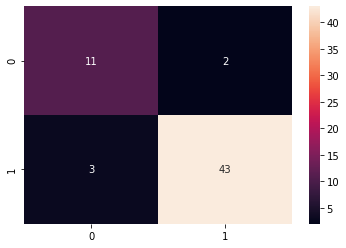

In [62]:
sns.heatmap(con,annot=True)

In [22]:
jitter = df[['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'Jitter:DDP']]

In [23]:
jitter

,MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:DDP
0,0.00784,0.00007,0.01109
1,0.00968,0.00008,0.01394
2,0.01050,0.00009,0.01633
3,0.00997,0.00009,0.01505
4,0.01284,0.00011,0.01966
...,...,...,...
190,0.00459,0.00003,0.00790
191,0.00564,0.00003,0.00994
192,0.01360,0.00008,0.01873
193,0.00740,0.00004,0.01109


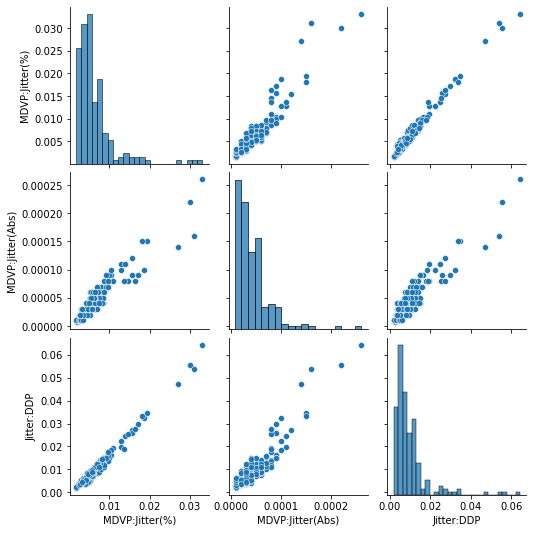

In [26]:
sns.pairplot(jitter)

In [29]:
shimmer = df[['MDVP:Shimmer','Shimmer:DDA']]

In [30]:
shimmer

,MDVP:Shimmer,Shimmer:DDA
0,0.04374,0.06545
1,0.06134,0.09403
2,0.05233,0.08270
3,0.05492,0.08771
4,0.06425,0.10470
...,...,...
190,0.04087,0.07008
191,0.02751,0.04812
192,0.02308,0.03804
193,0.02296,0.03794


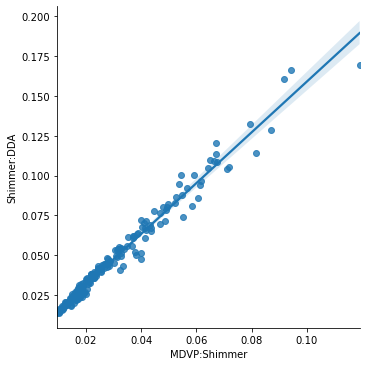

In [37]:
sns.lmplot(x='MDVP:Shimmer', y='Shimmer:DDA', data=shimmer)

<AxesSubplot:ylabel='Density'>

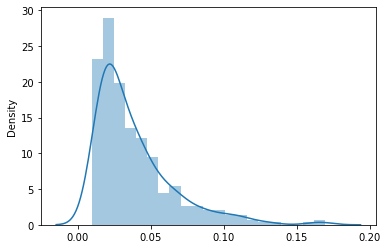

In [47]:
sns.distplot(shimmer)

C:\Users\karlj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

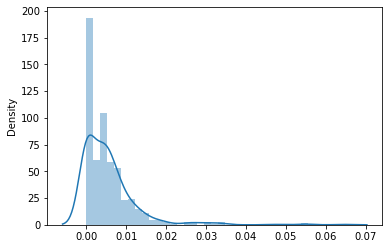

In [43]:
sns.distplot(jitter)

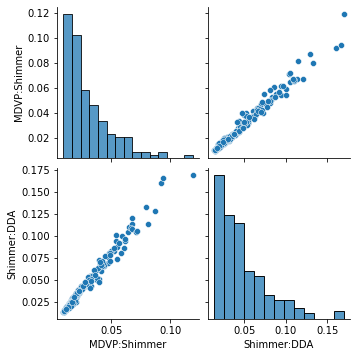

In [44]:
sns.pairplot(shimmer)